In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import math
from matplotlib import animation
%matplotlib notebook

# x = np.linspace(-40,40,200)
# plt.plot(x, U_exact(x,0,1,5))

def ddf(x,sig):
    val = np.zeros_like(x)
    val[(-(1/(2*sig))<=x) & (x<=(1/(2*sig)))] = 1
    return val


dir0 = 0.0  # u(0,t)= dir0
dir1 = 0.0  # u(1,t)= dir1
#  function for setting initial conditions in space

def I(x,sig): # initial u(x,0)
    M = np.size(x)
    i_x = ddf(x,sig)
    k = np.zeros_like(x)
    return i_x

def U_exact(x,t,sig,v,D):
    M = np.size(x)
    u_ex = np.zeros(M)
    if t == 0:
        u_ex = ddf(x,sig)
    else:
        y = x - v*t
        u_ex = np.exp(-y**2/(4*t*D))/np.sqrt(4*np.pi*t*D)
        u_ex[0] = dir0
        u_ex[M-1] = dir1
    return u_ex

def U_sol(Nt_gaps,T,Nx_spaces,L,v,I,sig,D):

    Nt_points = Nt_gaps + 1
    h = T/(Nt_points)  # time step

    t = np.linspace(0.,T,Nt_points)  # times at each time step
    Nx_points = Nx_spaces + 1 
    x_pde = np.linspace(-L, L, Nx_points)    # mesh points in space
    dx = x_pde[1] - x_pde[0] 
    dt = t[1] - t[0]

    # Setting B, C and v for the numerical soultions
    C = D*dt/(dx**2)
    B = v*dt/(dx*2)
    U = np.zeros((Nx_points,Nt_points))
    
    U[:,0]=I(x_pde,sig)
    # enforcing the boundary condition
    U[-L,:]  = dir0 
    U[L,:] = dir1

    u_old = I(x_pde,sig)

    u = np.zeros(Nx_points)
    # and to store the full solution
    U = np.zeros((Nx_points,Nt_points))
    U[:,0] = u_old
    for n in range(1, Nt_points):  
        # set Dirichlet boundary points here
        #...
        # compute u at inner mesh points
        for i in range(1, Nx_points-1):
            u[i] = (1-2*C)*u_old[i] + (C+B)*(u_old[i-1]) + (C-B)*(u_old[i+1])

        # update u_old before next step
        u_old[:]= u

        # copy into full storage
        U[:,n] = u;
    
    return U

In [90]:
def plotting(U,L,sig,T,Nt_gaps,Nx_spaces, v,D):
    size_t = np.size(U,1)-1 # number of time steps
    t = np.linspace(0.,T,Nt_gaps-1)
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    markers =['X','.','+','o']

    colours = ['r','c','b','orange','m'] # make comparison easy
    colour_pos = 0;
    x_pde = np.linspace(-L, L, Nx_spaces+1)
    N_dots = 20
    x_dots = np.linspace(-L, L, N_dots+1)    # spacial points to plot exact solution at

# some arbitarily chosen time points to compare at
    for plot_pos in [0, round(size_t/10), round(size_t/5), round(size_t/2), round(size_t-2)]:
    
    # exact solution
        U_tplot = U_exact(x_pde,t[plot_pos],sig,v,D) 
        label = "t=" + "%0.3f" % (round(t[plot_pos]),)
        ax[0].plot(x_pde,U_tplot,color = colours[colour_pos],ls='--', label=label)

    # numerical solution
        label = "t=" + "%0.3f" % (round(t[plot_pos]),)
        ax[1].plot(x_pde,U[:,plot_pos],color = colours[colour_pos],ls='--', label=label)
        colour_pos = colour_pos + 1;
    

    plt.xlim(-L,L) # zoom in on area of interest
    ax[0].legend(loc='upper left',fontsize = 7)
    ax[0].set(xlabel = 'Space (km)', ylabel = 'Concentration (Kg/km^3)', title = 'Exact solution')
    ax[1].legend(loc='upper left',fontsize = 7)
    ax[1].set(xlabel = 'Space (km)', ylabel = 'Concentration (Kg/km^3)', title = 'Numerical solution')
    plt.show()
    plt.savefig('basecase.pdf')

In [91]:
Nt_gaps,T,Nx_spaces,L,v,I,sig,D = 20000, 10000, 1000, 100, 0.0067056, I, 1,0.000864
#T = 10000s, L = 100km,, v=0.0067056km/s = 15mi/h, D= 0.000864km^2/s=0.24cm^2/s 
U = U_sol(Nt_gaps,T,Nx_spaces,L,v,I,sig,D)

<IPython.core.display.Javascript object>


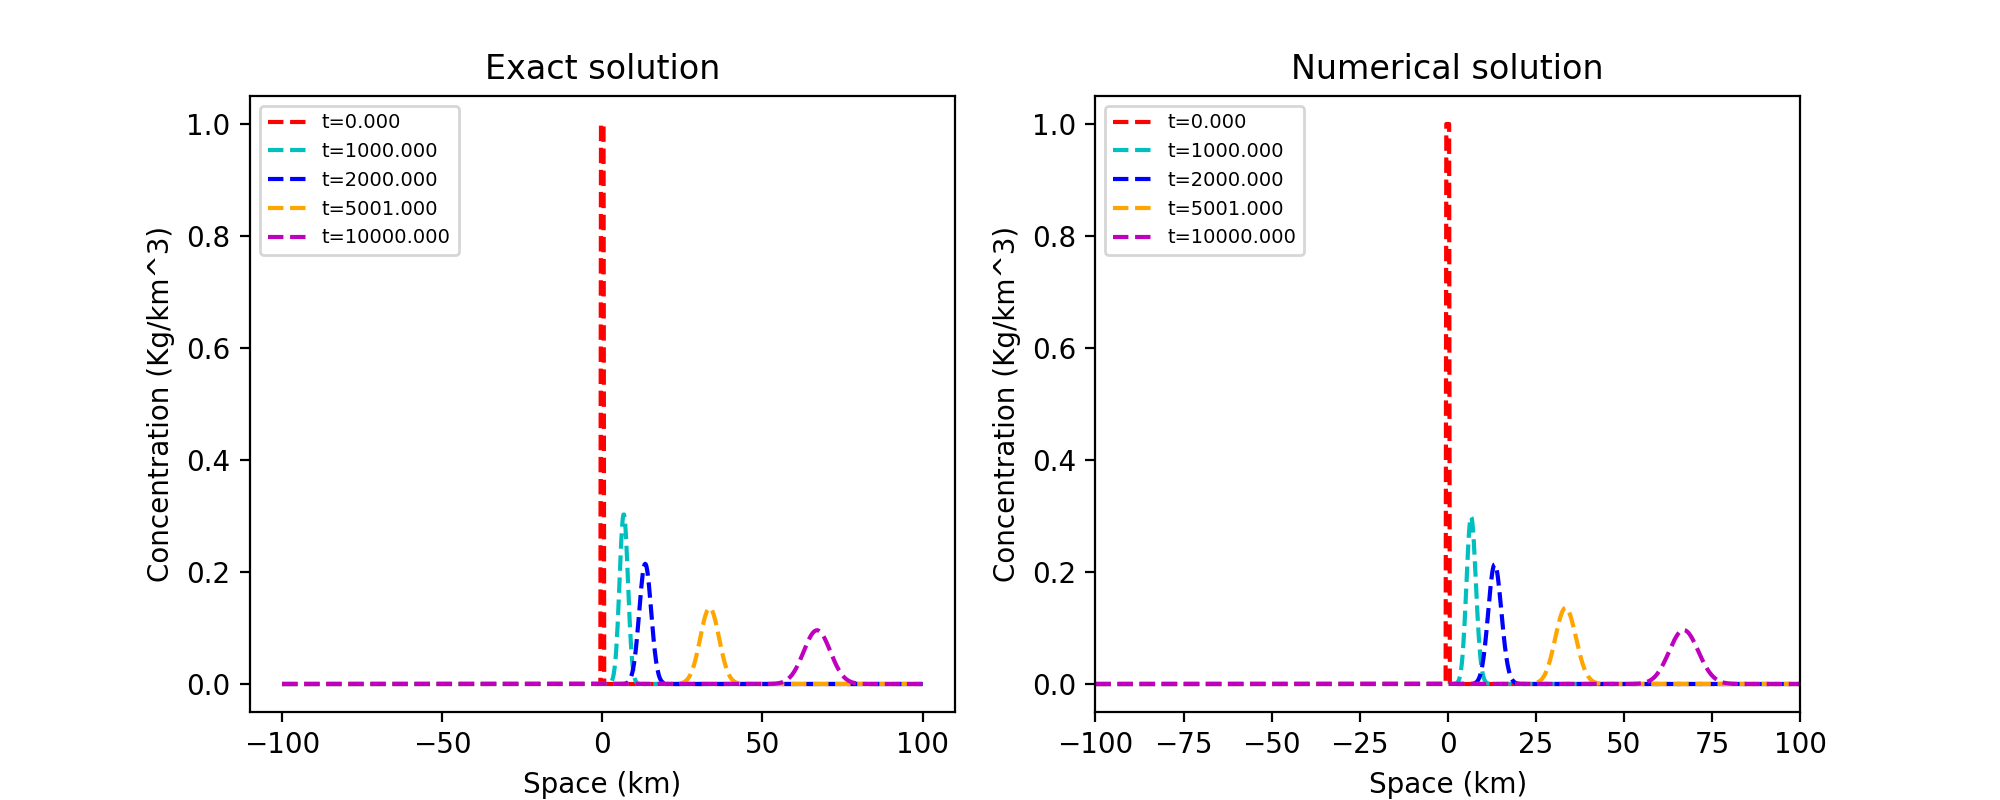

In [92]:
plotting(U,L,sig,T,Nt_gaps,Nx_spaces,v,D)

<IPython.core.display.Javascript object>


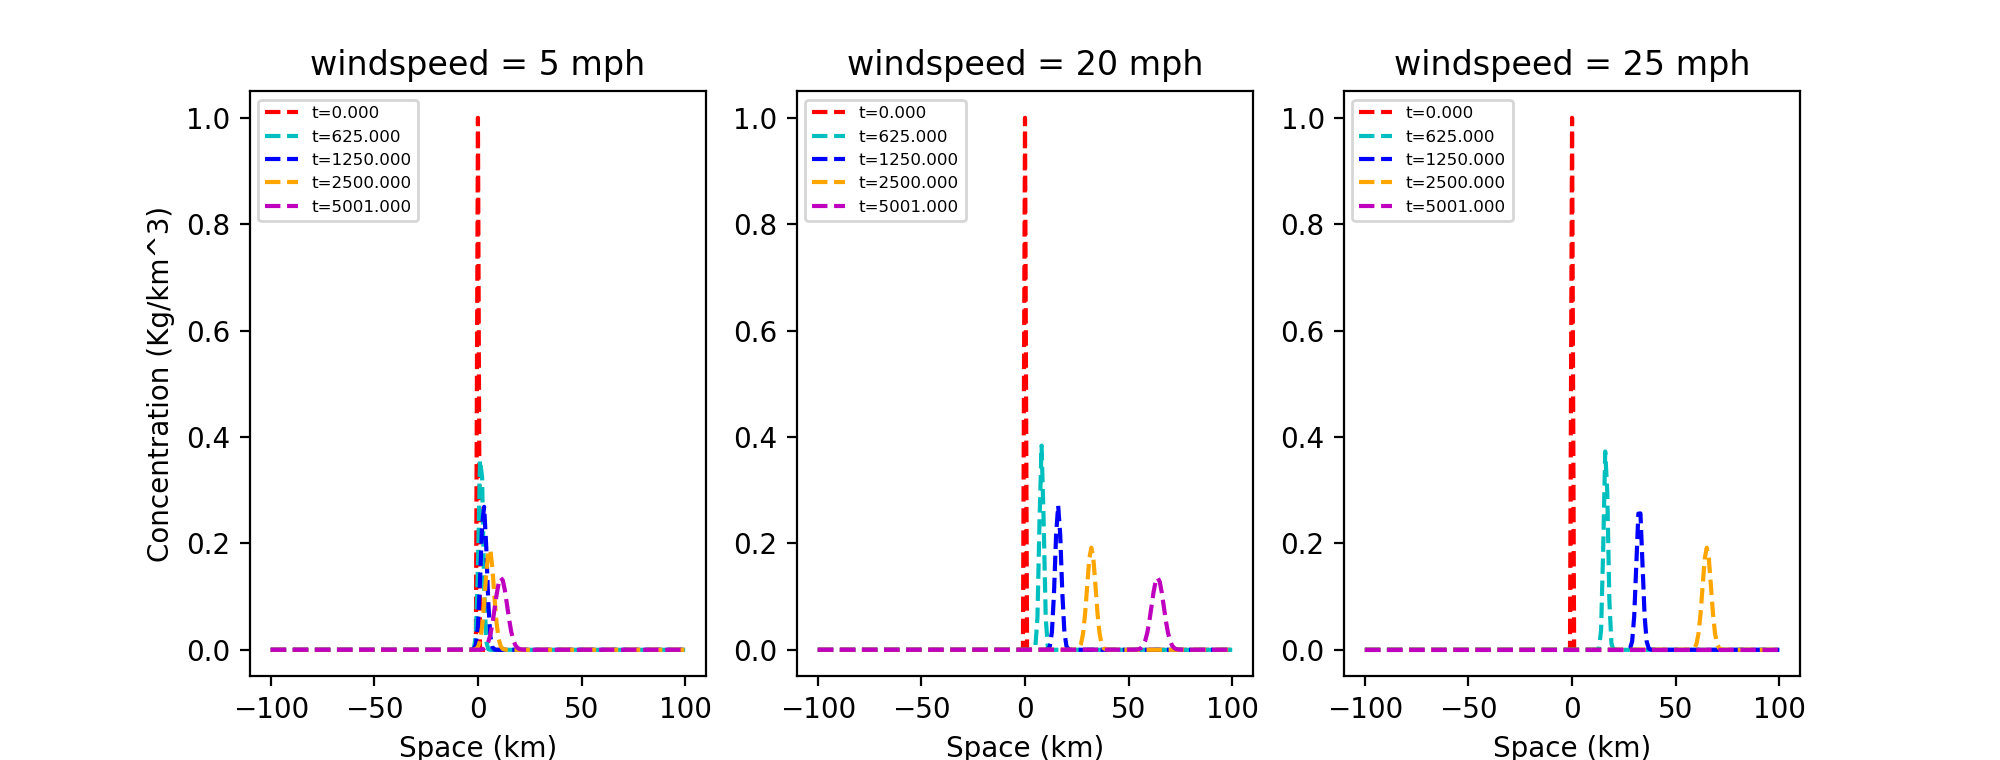

In [59]:
v1, v2, v3 = 0.0022352, 0.0128, 0.026
Nt_gaps = 20000
Nx_spaces = 200
Nx_points = Nx_spaces + 1 
T=10000
L=100
D = 0.000864
t = np.linspace(0.,T,Nt_gaps-1)
fig, ax = plt.subplots(1, 3, figsize=(10, 3.8))

colours = ['r','c','b','orange','m'] # make comparison easy
colour_pos = 0;
x_pde = np.linspace(-L, L, Nx_spaces+1)  

# some arbitarily chosen time points to compare at
for plot_pos in [0, 1250, 2500, 5000, 10000]:
    
    # exact solution
    U_tplot1 = U_exact(x_pde,t[plot_pos],sig,v1,D)
    U_tplot2 = U_exact(x_pde,t[plot_pos],sig,v2,D) 
    U_tplot3 = U_exact(x_pde,t[plot_pos],sig,v3,D)
    
    label = "t=" + "%0.3f" % (round(t[plot_pos]),)
    
    ax[0].plot(x_pde,U_tplot1,color = colours[colour_pos],ls='--', label=label)
    ax[1].plot(x_pde,U_tplot2,color = colours[colour_pos],ls='--', label=label)
    ax[2].plot(x_pde,U_tplot3,color = colours[colour_pos],ls='--', label=label)
    
    ax[0].legend(loc='upper left',fontsize = 6)
    ax[0].set(xlabel = 'Space (km)', ylabel = 'Concentration (Kg/km^3)', title = 'windspeed = 5 mph')
    ax[1].legend(loc='upper left',fontsize = 6)
    ax[1].set(xlabel = 'Space (km)', title = 'windspeed = 20 mph')
    ax[2].legend(loc='upper left',fontsize = 6)
    ax[2].set(xlabel = 'Space (km)', title = 'windspeed = 25 mph')
    plt.show()
    colour_pos = colour_pos + 1
plt.savefig("varying velocities.pdf")

<IPython.core.display.Javascript object>


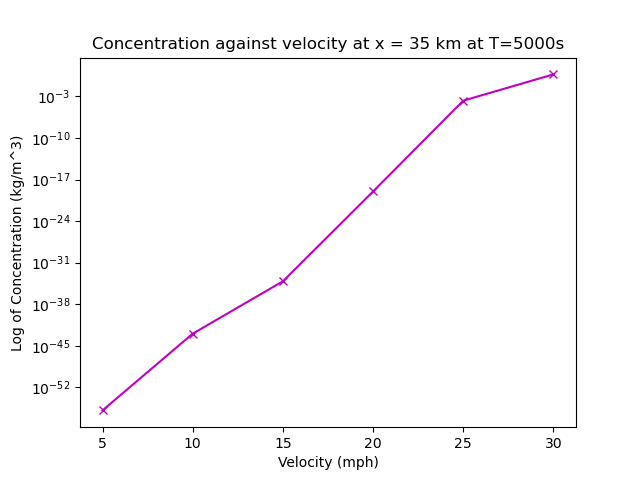

In [235]:
fig, ax = plt.subplots(1, 1)
Uvals = [U1, U2, U3, U4, U5, U6]
vvals = [v1, v2, v3, v4, v5, v6]
ax.plot([5,10,15,20,25,30], Uvals, 'x-', color = 'm')
# ax.axes.get_yaxis().set_visible(False)
# ax.axes.get_xaxis().set_visible(False)
ax.set(xlabel = 'Velocity (mph)', ylabel = 'Log of Concentration (kg/m^3)', title = 'Concentration against velocity at x = 35 km at T=5000s')
plt.yscale('log')
plt.savefig('varying velocities.pdf')

<ipython-input-188-5928cd9f2666>:5: RuntimeWarning: invalid value encountered in log
  plt.plot(vvals, np.log(Uvals))


<IPython.core.display.Javascript object>


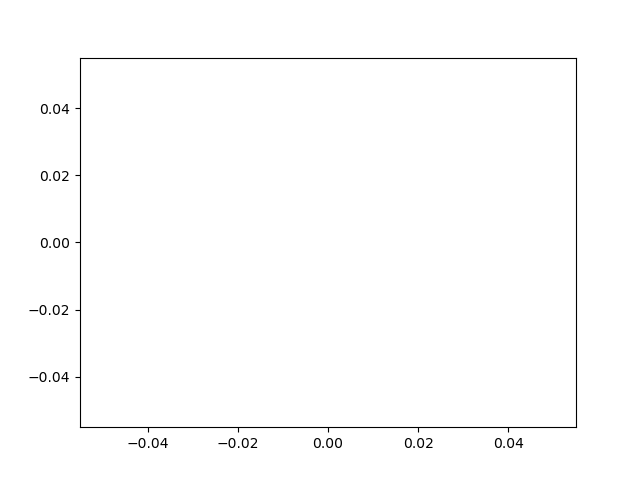

In [188]:
a = 2.8e-8
b = -1
Uvals = [U1+b, U2+b, U3+b, U4+b, U5+b, U6+b]
vvals = [a*v1, a*v2, a*v3, a*v4, a*v5, a*v6]
plt.plot(vvals, np.log(Uvals))
plt.show()

In [122]:
Nx_points = Nx_spaces + 1 
x_ex = np.linspace(-L, L, Nx_points)
t = np.linspace(0.,T,Nt_gaps+1)
size = np.shape(U)
Uexac = np.zeros(size)

for i in range(len(t)):
    Uexac[:, i] = U_exact(x_ex, t[i],sig,v,D)

residual_matrix1 = U - Uexac

In [119]:
res = np.linalg.norm(residual_matrix1, ord = 2)
resmax = residual_matrix1.max()
error = np.mean( U != Uexac )
error, resmax, res

(0.7703206248278994, 1.0, 35.594127737516885)

In [ ]:
def res2norm(Nt_gaps,U):
    Nx_points = Nx_spaces + 1 
    x_ex = np.linspace(-L, L, Nx_points)
    t = np.linspace(0.,T,Nt_gaps+1)
    size = np.shape(U)
    Uexac = np.zeros(size)

    for i in range(len(t)):
        Uexac[:, i] = U_exact(x_ex, t[i],sig,v,D)

    residual_matrix1 = U - Uexac
    